In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def do_feature_engineering(train_data, test_data):
    """
        特征工程获取文本特征
        参数：
            - train_data    训练样本集
            - test_data     测试样本集
        返回：
            - train_X       训练特征
            - test_X        测试特征
    """

    train_proc_text = train_data['proc_info'].values
    test_proc_text = test_data['proc_info'].values

    # TF-IDF特征提取,max_features=1000
    tfidf_vectorizer = TfidfVectorizer()
    train_tfidf_feat = tfidf_vectorizer.fit_transform(train_proc_text).toarray()
    test_tfidf_feat = tfidf_vectorizer.transform(test_proc_text).toarray()
    print('特征名：{}'.format(tfidf_vectorizer.get_feature_names()))

    train_proc_os_type = train_data['proc_os_type'].values
    test_proc_os_type = test_data['proc_os_type'].values
    # TF-IDF特征提取,max_features=1000
    tfidf_vectorizer_os = TfidfVectorizer()
    train_tfidf_os_type = tfidf_vectorizer_os.fit_transform(train_proc_os_type).toarray()
    test_tfidf_os_type = tfidf_vectorizer_os.transform(test_proc_os_type).toarray()
    print('操作系统特征名：{}'.format(tfidf_vectorizer_os.get_feature_names()))
    # 合并特征
    train_X = np.hstack((train_tfidf_feat, train_tfidf_os_type))
    test_X = np.hstack((test_tfidf_feat, test_tfidf_os_type))

    return train_X, test_X

In [4]:
dataset=pd.read_csv('dataset.csv')
train_data, test_data = train_test_split(dataset, test_size=1/4, random_state=0)
# 特征工程处理
# 构建训练测试数据
X_train, X_test =do_feature_engineering(train_data, test_data)
print('共有{}维特征。'.format(X_train.shape[1]))
# 标签处理
y_train = train_data['label'].values
y_test = test_data['label'].values


特征名：['00', '000', '0000', '000000', '000000001127', '0000888', '0003', '001', '003', '004', '005', '0068b1', '0072c6', '007cef', '008', '00e8fc', '00hvhcgzsdsgadjwhapi', '01', '0123456789987654', '016', '01f785d629d23c3c7bf663da5cc5ff9f81f84e74c565596f06abe4e9e0a851643e7c62f7dbb923331cbd50391996f81c74c1232598520bb05cf84c71e42ed7b3bb33c34b16', '02', '020031', '0204e08e370d82503', '022126', '03', '038', '039', '04', '04c4d26512d1d45d68c0edbeb1a7c7fda89d510f', '05', '05cf465375d41', '06', '0634046e98dc6b5194b3b6e837dff1ce', '064', '07', '07092', '076c59a052203d23f', '07em', '07t02', '08', '0800', '08p', '09', '0900', '0985ce', '09e7a54b3c0e42cf23f1deb97f4f6b95', '0a1a', '0cac', '0de390ec3525b27ccb64b7296eb2b8b75e22786f', '0e9ff4', '0em', '0o', '0px', '0x409', '10', '100', '1000', '10000', '10000px', '1000px', '10030', '1005', '100px', '1011', '10155', '1015886015', '102', '102300', '102310', '1024', '103', '1033398', '10408', '1052741330', '106', '1061', '10668', '107', '10734', '1077b1',

In [5]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)
score1 = model1.score(X_test, y_test)
print('测试集得分：{}'.format(score1))

测试集得分：0.8909090909090909


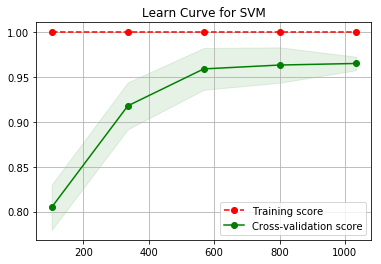

In [14]:
#train_size, train_score, valid_score = learning_curve(model1, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0,5,endpoint=True))
#SVM学习曲线
train_size, train_score, valid_score = learning_curve(SVC(C=30.0,kernel='linear'), X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0,5,endpoint=True))

train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
valid_scores_mean = np.mean(valid_score, axis=1)
valid_scores_std = np.std(valid_score, axis=1)

plt.fill_between(train_size, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_size, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_size, train_scores_mean, 'o--', color="r",
             label="Training score")
plt.plot(train_size, valid_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.grid()
plt.title('Learn Curve for SVM')
#图例位置
plt.legend(loc="best")
plt.savefig('svm.png')

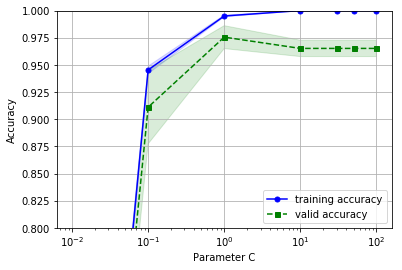

In [11]:
#SVM验证曲线
c_range=[0.01,0.1,1.0,10.0,30.0,50.0,100.0]
#10折，验证正则化参数C
train_scores,valid_scores =validation_curve(estimator=SVC(kernel='linear'),X=X_train,y=y_train,param_name='C',param_range=c_range,cv=10)
#统计结果
train_mean= np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
valid_mean =np.mean(valid_scores,axis=1)
valid_std=np.std(valid_scores,axis=1)
plt.plot(c_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(c_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(c_range,valid_mean,color='green',linestyle='--',marker='s',markersize=5,label='valid accuracy')
plt.fill_between(c_range,valid_mean+valid_std,valid_mean-valid_std,alpha=0.15,color='green')
plt.grid()
plt.xscale('log')#横轴采用对数坐标系
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

In [6]:
#各模型学习曲线
model_name_dict = {'kNN': KNeighborsClassifier(n_neighbors=5),
                   'LR': LogisticRegression(C=30),
                   'SVM': SVC(C=1,kernel='linear'),
                   'DT': DecisionTreeClassifier(max_depth=100),
                   'RF': RandomForestClassifier(n_estimators=250),
                   'NB': GaussianNB()
                   'GBDT': GradientBoostingClassifier(learning_rate=0.01)
                    }
for model_name, model in model_name_dict.items():
    train_size, train_score, valid_score = learning_curve(model, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0,5,endpoint=True))

    train_scores_mean = np.mean(train_score, axis=1)
    train_scores_std = np.std(train_score, axis=1)
    valid_scores_mean = np.mean(valid_score, axis=1)
    valid_scores_std = np.std(valid_score, axis=1)

    plt.fill_between(train_size, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_size, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    plt.plot(train_size, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_size, valid_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.grid()
    plt.title('Learn Curve for '+model_name)
    #图例位置
    plt.legend(loc="best")
    plt.savefig(model_name+'.png')
    plt. close()

In [7]:
#各模型验证曲线（横轴不用对数坐标系） 
model_name_param_dict = {'kNN': (KNeighborsClassifier(), {'n_neighbors': [5,10,15,25,30]}),
                         #'kNN': (KNeighborsClassifier(), {'n_neighbors': [1,3,5,10]})
                          #'LR': (LogisticRegression(),{'C': [0.01,0.1,1.0,10.0,30.0,50.0,100.0]}),
                          #'SVM': (SVC(kernel='linear'),{'C': [0.01,0.1,1.0,10.0,30.0,50.0,100.0]}),
                         'DT': (DecisionTreeClassifier(),{'max_depth': [50,100,150,200,250]}),
                          #'GBDT': (GradientBoostingClassifier(),{'learning_rate': [0.01, 0.1, 1, 10, 100]}),
                         'RF': (RandomForestClassifier(),{'n_estimators': [50,100, 150, 200, 250]})
                           }
for model_name, (model, param_range) in model_name_param_dict.items():
    train_scores,valid_scores =validation_curve(estimator=model,X=X_train,y=y_train,param_name=list(param_range.keys())[0],param_range=list(param_range.values())[0],cv=10)
    #统计结果
    train_mean= np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    valid_mean =np.mean(valid_scores,axis=1)
    valid_std=np.std(valid_scores,axis=1)
    plt.plot(list(param_range.values())[0],train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
    plt.fill_between(list(param_range.values())[0],train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(list(param_range.values())[0],valid_mean,color='green',linestyle='--',marker='s',markersize=5,label='valid accuracy')
    plt.fill_between(list(param_range.values())[0],valid_mean+valid_std,valid_mean-valid_std,alpha=0.15,color='green')
    plt.grid()
    plt.title('Valid Curve for '+model_name)
    #plt.xscale('log')#横轴采用对数坐标系
    plt.xlabel('Parameter :'+list(param_range.keys())[0])
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.8,1.05])
    plt.savefig(model_name+'valid(2).png')
    plt. close()

In [5]:
#各模型验证曲线，横轴采用对数坐标系
model_name_param_dict = {#'kNN': (KNeighborsClassifier(), {'n_neighbors': [5,10,15,25,30]}),
                         'LR': (LogisticRegression(),{'C': [0.01,0.1,1.0,10.0,30.0,50.0,100.0]}),
                         'SVM': (SVC(kernel='linear'),{'C': [0.01,0.1,1.0,10.0,30.0,50.0,100.0]}),
                          #'DT': (DecisionTreeClassifier(),{'max_depth': [50,100,150,200,250]}),
                         'GBDT': (GradientBoostingClassifier(),{'learning_rate': [0.001,0.01, 0.1, 1, 10, 100]}),
                          #'RF': (RandomForestClassifier(),{'n_estimators': [50,100, 150, 200, 250]})
                           }
for model_name, (model, param_range) in model_name_param_dict.items():
    train_scores,valid_scores =validation_curve(estimator=model,X=X_train,y=y_train,param_name=list(param_range.keys())[0],param_range=list(param_range.values())[0],cv=10)
    #统计结果
    train_mean= np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    valid_mean =np.mean(valid_scores,axis=1)
    valid_std=np.std(valid_scores,axis=1)
    plt.plot(list(param_range.values())[0],train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
    plt.fill_between(list(param_range.values())[0],train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(list(param_range.values())[0],valid_mean,color='green',linestyle='--',marker='s',markersize=5,label='valid accuracy')
    plt.fill_between(list(param_range.values())[0],valid_mean+valid_std,valid_mean-valid_std,alpha=0.15,color='green')
    plt.grid()
    plt.title('Valid Curve for '+model_name)
    plt.xscale('log')#横轴采用对数坐标系
    plt.xlabel('Parameter :'+list(param_range.keys())[0])
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.8,1.05])
    plt.savefig(model_name+'valid.png')
    plt. close()